# Memahami Data:

## Deskripsi data  

Data merupakan bahan mentah yang dianalisis untuk menemukan pola, hubungan, atau wawasan yang berguna dan bermanfaat


Dataset Iris adalah salah satu dataset yang paling terkenal dalam bidang ilmu data dan pembelajaran mesin. Dataset Iris terdiri dari 150 sampel dari tiga spesies Iris (Iris setosa, Iris virginica, dan Iris versicolor), masing-masing dengan empat fitur (panjang dan lebar kelopak dan mahkota) dalam sentimeter.

Karena ukurannya yang kecil dan fiturnya yang jelas, dataset Iris sering digunakan sebagai contoh awal dalam mempelajari berbagai teknik analisis data dan pembelajaran mesin.

## Struktur 

kode di bawah untuk menghubungkan ke database dengan python

In [17]:
!pip install mysql-connector-python


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
from sqlalchemy import create_engine
import pandas as pd

# Informasi koneksi ke database MySQL di cloud Aiven
hostname = 'mysql-b8e8705-nico22101.a.aivencloud.com'
port = 15404
username = 'avnadmin'
password = 'AVNS_1WxvRGymUGjuW0Z29gd'
database = 'defaultdb'

# Membuat string koneksi SQLAlchemy
connection_string = f'mysql+mysqlconnector://{username}:{password}@{hostname}:{port}/{database}'

# Membuat engine SQLAlchemy
engine = create_engine(connection_string)

# Membaca data dari database menggunakan Pandas
query = "SELECT * FROM `iriscopy`"  
dataset = pd.read_sql(query, engine)

# Menutup koneksi ke database
engine.dispose()


In [4]:
dataset.columns 

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'class'],
      dtype='object')

In [5]:
dataset.dtypes #untuk mengetahui tipe data tiap kolom

id                int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [ ]:
dataset.shape #untuk mengetahui jumlah baris dan kolom

(150, 6)

## Fitur

Fitur seperti sepal_length, sepal_width, petal_length, dan petal_width dalam dataset Iris digunakan untuk menggambarkan karakteristik dari bunga iris

sepal_length adalah panjang dari kelopak bunga iris dalam satuan yang sama (biasanya sentimeter), sepal_width adalah lebar dari kelopak, petal_length adalah panjang dari mahkota bunga, dan petal_width adalah lebar dari mahkota.

##  Tampilan

In [6]:
df_1 = _deepnote_execute_sql('SELECT * FROM `defaultdb`.`iriscopy` LIMIT 1000', 'SQL_E260CBEB_4E67_484D_8D5F_FDCC9DEC71A5', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Deskripsi Statistik

In [7]:
dataset.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Keterangan :

- Count adalah jumlah data yang ada dalam setiap kolom.
- Mean adalah nilai rata-rata dari data dalam setiap kolom.
- std (Standar deviasi) adalah ukuran seberapa jauh data tersebar dari rata-rata dalam setiap kolom.
- min(minimum) adalah nilai terkecil dalam setiap kolom.
- 25% (Kuartil pertama/Q1) adalah nilai yang membagi 25% data terendah dari data dalam setiap kolom.
- 50% (Median atau kuartil kedua/Q2) adalah nilai yang membagi data menjadi dua bagian sama besar dalam setiap kolom.
- 75% (Kuartil ketiga/Q3) adalah nilai yang membagi 75% data tertinggi dari data dalam setiap kolom.
- Max (Nilai maksimum) adalah nilai terbesar dalam setiap kolom.


## Jumlah data setiap class/species

In [10]:
dataset.groupby('class').size()  # mengetahui jumlah masing-masing class/species

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

- Iris-setosa sebanyak 50

- Iris-vesicolor sebanyak 50

- Iris-virginica sebanyak 50

## Pra-proses data

### Dengan mean

berikut adalah tampilan data kosong

In [11]:
df_5 = _deepnote_execute_sql('SELECT * FROM `defaultdb`.`missingcopy` LIMIT 20', 'SQL_E260CBEB_4E67_484D_8D5F_FDCC9DEC71A5', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_5

,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,NaN,3.0,1.4,0.2,Iris-setosa
2,3,NaN,3.2,1.3,0.2,Iris-setosa
3,4,NaN,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,NaN,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,NaN,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


mencari mean dengan query dan update dengan query di tool **mysql workbench**

SET @avg_sepal_length := (SELECT AVG(sepal_length) FROM defaultdb.iris WHERE sepal_length IS NOT NULL);

UPDATE defaultdb.iris
SET sepal_length = IF(sepal_length IS NULL, @avg_sepal_length, sepal_length);


In [12]:
df_2 = _deepnote_execute_sql('SELECT * FROM `defaultdb`.`iris` LIMIT 10', 'SQL_E260CBEB_4E67_484D_8D5F_FDCC9DEC71A5', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.10000,3.5,1.4,0.2,Iris-setosa
1,2,5.87931,3.0,1.4,0.2,Iris-setosa
2,3,5.87931,3.2,1.3,0.2,Iris-setosa
3,4,5.87931,3.1,1.5,0.2,Iris-setosa
4,5,5.00000,3.6,1.4,0.2,Iris-setosa
5,6,5.87931,3.9,1.7,0.4,Iris-setosa
6,7,4.60000,3.4,1.4,0.3,Iris-setosa
7,8,5.00000,3.4,1.5,0.2,Iris-setosa
8,9,5.87931,2.9,1.4,0.2,Iris-setosa
9,10,4.90000,3.1,1.5,0.1,Iris-setosa


### Dengan KNN

In [13]:
df_4 = _deepnote_execute_sql('UPDATE irisknn AS t1\nSET\n    t1.sepal_length = (\n        SELECT AVG(sub.sepal_length)\n        FROM (\n            SELECT t2.sepal_length\n            FROM irisknn AS t2\n            WHERE t2.sepal_length IS NOT NULL\n            ORDER BY SQRT(\n                POWER(t1.sepal_length - t2.sepal_length, 2) +\n                POWER(t1.sepal_width - t2.sepal_width, 2) +\n                POWER(t1.petal_length - t2.petal_length, 2) +\n                POWER(t1.petal_width - t2.petal_width, 2)\n            ) ASC\n            LIMIT 5\n        ) AS sub\n    )\nWHERE\n    t1.sepal_length IS NULL;', 'SQL_E260CBEB_4E67_484D_8D5F_FDCC9DEC71A5', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_4

In [14]:
df_3 = _deepnote_execute_sql('SELECT * FROM `defaultdb`.`irisknn` LIMIT 10', 'SQL_E260CBEB_4E67_484D_8D5F_FDCC9DEC71A5', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.10000,3.5,1.4,0.2,Iris-setosa
1,2,4.92000,3.0,1.4,0.2,Iris-setosa
2,3,4.92400,3.2,1.3,0.2,Iris-setosa
3,4,4.90880,3.1,1.5,0.2,Iris-setosa
4,5,5.00000,3.6,1.4,0.2,Iris-setosa
5,6,4.97056,3.9,1.7,0.4,Iris-setosa
6,7,4.60000,3.4,1.4,0.3,Iris-setosa
7,8,5.00000,3.4,1.5,0.2,Iris-setosa
8,9,4.97056,2.9,1.4,0.2,Iris-setosa
9,10,4.90000,3.1,1.5,0.1,Iris-setosa


# Outlier

## Konsep Local Outlier Factor

Local Outlier Factor (LOF) adalah metode yang digunakan dalam analisis data untuk mengidentifikasi observasi yang dianggap sebagai outlier berdasarkan konteks lokal atau lingkungan mereka. 
LOF memberikan skor untuk setiap data berdasarkan seberapa "aneh" atau tidak biasa data tersebut dibandingkan dengan tetangga-tetangganya.

Berikut adalah konsep utama dari LOF:

- Local Reachability Density (LRD):
Local Reachability Density (LRD) adalah ukuran kepadatan lokal dari sebuah data. Ini menunjukkan seberapa dekat sebuah data dengan tetangganya dalam ruang fitur. LRD didefinisikan sebagai kebalikan dari jarak rata-rata antara sebuah data dan tetangganya dalam k-NN. Semakin kecil jarak rata-rata, semakin besar LRD.

- Local Outlier Factor (LOF):
Local Outlier Factor (LOF) adalah rasio dari LRD sebuah data terhadap LRD dari tetangga-tetangganya. Ini mengukur seberapa jauh sebuah data dari tetangganya dalam hal kepadatan. Data dengan LOF yang tinggi cenderung menjadi outlier karena mereka memiliki kepadatan yang jauh lebih rendah dibandingkan dengan tetangga-tetangganya.

Proses utama dalam menghitung LOF melibatkan langkah-langkah berikut:

- Hitung jarak antara semua pasang data dalam ruang fitur.
- Temukan k tetangga terdekat untuk setiap data.
- Hitung LRD untuk setiap data dengan menghitung kebalikan dari jarak rata-rata antara data dan tetangganya.
- Hitung LOF untuk setiap data dengan membandingkan LRD dari data dengan LRD dari tetangga-tetangganya.

## Menghitung Manual Local Outlier

menghitung jarak

<img src="Screenshot 2024-03-28 034244.png" width="" align="" />

<img src="Screenshot 2024-03-28 034416.png" width="" align="" />

<img src="image-20240328-035037.png" width="50%" align="left" />

<img src="image-20240328-042247.png" width="" align="left" />

<img src="image-20240328-043951.png" width="50%" align="left" />

<img src="image-20240328-052612.png" width="" align="left" />

<img src="image-20240328-050421.png" width="50%" align="left" />

<img src="image-20240328-055833.png" width="" align="left" />

## Menghitung Menggunakan Python (sckit-learn)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

X = [
    (0, 2, 2),
    (1, 1, 3),
    (2, 1, 1),
    (3, 3, 2),
    (1, 5, 3),
    (1, 4, 4),
    (1, 2, 4),
    (1, 3, 4),
    (12, 12, 12),
    (2, 2, 2),
]

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_pred = lof.fit_predict(X)

print("Predicted table:", y_pred)
print("Negative LOF scores:", -lof.negative_outlier_factor_) 

Predicted table: [ 1  1  1  1  1  1  1  1 -1  1]
Negative LOF scores: [0.95045869 0.95045869 1.02204263 1.03124204 1.0219927  1.08205925
 0.89245404 1.03588377 6.67809386 1.08895707]


## Implementasi pada dataset Iris

menambahkan beberapa outlier

In [32]:
df_6 = _deepnote_execute_sql('UPDATE irisoutlier SET sepal_length = 11 WHERE Id IN (4, 8, 12, 1, 5)\n', 'SQL_E260CBEB_4E67_484D_8D5F_FDCC9DEC71A5', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_6

In [33]:
df_7 = _deepnote_execute_sql('UPDATE irisoutlier SET sepal_width = 12 WHERE Id IN (4, 8,11, 12)\n', 'SQL_E260CBEB_4E67_484D_8D5F_FDCC9DEC71A5', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_7

In [34]:
df_8 = _deepnote_execute_sql('SELECT * FROM `defaultdb`.`irisoutlier` LIMIT 100', 'SQL_E260CBEB_4E67_484D_8D5F_FDCC9DEC71A5', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_8

,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,11.0,4.0,7.0,2.5,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,11.0,12.0,1.5,0.2,Iris-setosa
4,5,11.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


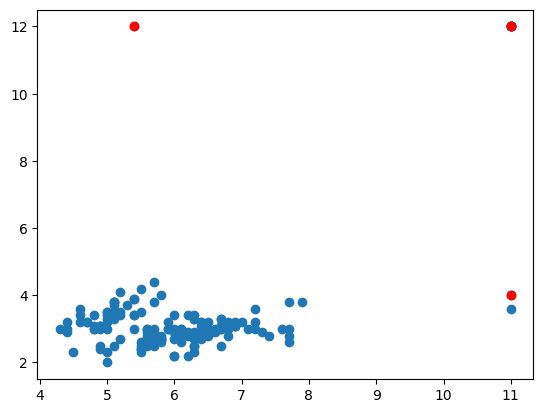

In [35]:
import mysql.connector
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Informasi koneksi ke database MySQL
hostname = 'mysql-b8e8705-nico22101.a.aivencloud.com'
port = 15404
username = 'avnadmin'
password = 'AVNS_1WxvRGymUGjuW0Z29gd'
database = 'defaultdb'

conn = mysql.connector.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# Membaca data dari database
query = "SELECT sepal_length, sepal_width FROM irisoutlier"
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()
x = [[row[0], row[1]] for row in rows]

# Menutup koneksi ke database
conn.close()

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.03)

# Melakukan prediksi outlier
y_pred = lof.fit_predict(x)

# Menampilkan data dengan outlier yang diidentifikasi
outlier_indices = [i for i, label in enumerate(y_pred) if label == -1]
outlier_values = [x[i] for i in outlier_indices]

plt.scatter([point[0] for point in x], [point[1] for point in x])
plt.scatter([point[0] for point in outlier_values], [point[1] for point in outlier_values], color='r')
plt.show()


titik merah adalah outlier

# Integrasi 2 sumber

install psycopg2 terlebih dahulu

In [18]:
pip install psycopg2-binary



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import psycopg2
import mysql.connector

# Koneksi ke MySQL
mysql_conn = mysql.connector.connect(
    host="mysql-b8e8705-nico22101.a.aivencloud.com",
    port = 15404,
    user="avnadmin",
    password="AVNS_1WxvRGymUGjuW0Z29gd",
    database="defaultdb"
)

# Query untuk mengambil data dari MySQL
mysql_query = "SELECT id, sepal_length, sepal_width FROM iriscopy;"

# Mengambil data dari MySQL ke DataFrame
mysql_df = pd.read_sql(mysql_query, mysql_conn)

# Koneksi ke PostgreSQL
postgres_conn = psycopg2.connect(
    host="postgresql-nico22101.a.aivencloud.com",
    port = 15404,
    database="defaultdb",
    user="avnadmin",
    password="AVNS_7FSfVpq4Jofis8WGzve"
)

# Query untuk mengambil data dari PostgreSQL
postgres_query = "SELECT petal_length, petal_width, class FROM iris;"

# Mengambil data dari PostgreSQL ke DataFrame
postgres_df = pd.read_sql(postgres_query, postgres_conn)

# Gabungkan kedua DataFrame berdasarkan index
merged_df = pd.merge(mysql_df, postgres_df, left_index=True, right_index=True)

# Tampilkan DataFrame yang telah digabung
print(merged_df)


/tmp/ipykernel_80/1956194530.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mysql_df = pd.read_sql(mysql_query, mysql_conn)
/tmp/ipykernel_80/1956194530.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  postgres_df = pd.read_sql(postgres_query, postgres_conn)
      id  sepal_length  sepal_width  petal_length  petal_width           class
0      1           5.1          3.5           1.4          0.2     Iris-setosa
1      2           4.9          3.0           1.4          0.2     Iris-setosa
2      3           4.7          3.2           1.3          0.2     Iris-setosa
3      4           4.6          3.1           1.5          0.2     Iris-setosa
4      5           5.0

id, sepal_length, dan sepal_width diambil dari mysql, sedangkan petal_length, petal_width, dan class diambil dari postgre

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce5bb5da-f005-4a0b-8114-37accbca2d46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>